# Nigeria Property Housing Price Prediction Using Machine Learning

In [70]:
# import libraries for inspection, data cleaning and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for preprocessing, regression models etc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# import evaluation metrics
from sklearn.metrics import r2_score

# import pickle for saving and loading model
import pickle
import joblib 


In [71]:
# Load Dataset
house_df = pd.read_csv("../raw_data/house_clean_data.csv")
house_df

,title,type,address,description,price,bedrooms,bathrooms,toilets,parking_spaces,location
0,3 Bedroom Apartment In Ologolo,flat / apartment,"Ologolo, Lekki, Lagos",Self serviced\n3bedroom fr rent in ologolo\nre...,3500000.0,3,3,3,0,Lekki
1,Luxury 2 Bedroom Apartment,flat / apartment,"Newtown Estate, Ogombo, Ajah, Lagos",Brand new\ngood water\nluxury home\nfitted kit...,1300000.0,2,2,3,2,Ajah
2,Well Maintained 5 Bedroom Detached Duplex With Bq,detached duplex,"Lekki Phase 1, Lekki, Lagos",Well maintained 5 bedroom detached duplex with...,20000000.0,5,5,6,3,Lekki
3,Refurbished 3 Bedroom Luxury Flat With Bq,flat / apartment,"Lekki Phase 1, Lekki, Lagos",Refurbished 3 bedroom luxury flats with bq ava...,8500000.0,3,3,3,3,Lekki
4,Slick 2 Bedroom Apartment In Ologolo,flat / apartment,"Ologolo, Lekki, Lagos",2 bedroom apartmemt for rent\nrent 2.8m\nservi...,2800000.0,2,2,3,2,Lekki
...,...,...,...,...,...,...,...,...,...,...
21589,A Fully Furnished 4 Bedroom Semi-detached Duplex,semi-detached duplex,"Spg Road, Igbo-efon, Lekki, Lagos",A fully furnished 4 bedroom semi-detached dupl...,4000000.0,4,4,5,3,Lekki
21590,Furnished 3 Bedroom Flat,flat / apartment,"Coral Beach Estate, Lekki Free Trade Zone, Lek...",Furnished 3 bedroom apartment at coral beach e...,6000000.0,3,4,4,0,Lekki
21591,Executive All Rooms En-suite 3 Bedroom,terraced duplex,"Lekki Gardens Phase 2, Ajah, Lagos",Executive all rooms 3 bedroom corner piece ter...,2200000.0,3,3,4,4,Ajah
21592,"Shop Space, Upstairs",Shop,"Adebayo Doherty Road, Lekki Phase 1, Lekki, Lagos",Shop space upstairs on adebayo doherty road le...,2500000.0,0,0,1,0,Lekki


## Inspect Data

In [72]:
house_df.head()

,title,type,address,description,price,bedrooms,bathrooms,toilets,parking_spaces,location
0,3 Bedroom Apartment In Ologolo,flat / apartment,"Ologolo, Lekki, Lagos",Self serviced\n3bedroom fr rent in ologolo\nre...,3500000.0,3,3,3,0,Lekki
1,Luxury 2 Bedroom Apartment,flat / apartment,"Newtown Estate, Ogombo, Ajah, Lagos",Brand new\ngood water\nluxury home\nfitted kit...,1300000.0,2,2,3,2,Ajah
2,Well Maintained 5 Bedroom Detached Duplex With Bq,detached duplex,"Lekki Phase 1, Lekki, Lagos",Well maintained 5 bedroom detached duplex with...,20000000.0,5,5,6,3,Lekki
3,Refurbished 3 Bedroom Luxury Flat With Bq,flat / apartment,"Lekki Phase 1, Lekki, Lagos",Refurbished 3 bedroom luxury flats with bq ava...,8500000.0,3,3,3,3,Lekki
4,Slick 2 Bedroom Apartment In Ologolo,flat / apartment,"Ologolo, Lekki, Lagos",2 bedroom apartmemt for rent\nrent 2.8m\nservi...,2800000.0,2,2,3,2,Lekki


In [73]:
house_df.tail()

,title,type,address,description,price,bedrooms,bathrooms,toilets,parking_spaces,location
21589,A Fully Furnished 4 Bedroom Semi-detached Duplex,semi-detached duplex,"Spg Road, Igbo-efon, Lekki, Lagos",A fully furnished 4 bedroom semi-detached dupl...,4000000.0,4,4,5,3,Lekki
21590,Furnished 3 Bedroom Flat,flat / apartment,"Coral Beach Estate, Lekki Free Trade Zone, Lek...",Furnished 3 bedroom apartment at coral beach e...,6000000.0,3,4,4,0,Lekki
21591,Executive All Rooms En-suite 3 Bedroom,terraced duplex,"Lekki Gardens Phase 2, Ajah, Lagos",Executive all rooms 3 bedroom corner piece ter...,2200000.0,3,3,4,4,Ajah
21592,"Shop Space, Upstairs",Shop,"Adebayo Doherty Road, Lekki Phase 1, Lekki, Lagos",Shop space upstairs on adebayo doherty road le...,2500000.0,0,0,1,0,Lekki
21593,A Very Spacious Commercial Space,Plaza / complex / mall,"Admiralty Way, Lekki Phase 1, Lekki, Lagos",Very spacious commercial shop on admiralty way...,3000000.0,0,1,1,10,Lekki


In [74]:
house_df.sample()

,title,type,address,description,price,bedrooms,bathrooms,toilets,parking_spaces,location
4700,Affordable Shop Spaces,Shop,"Olokonla, Ajah, Lagos","A very decent shop can be used for restaurant,...",15000000.0,0,0,0,0,Ajah


In [75]:
house_df.shape

(21594, 10)

In [76]:
house_df.columns

Index(['title', 'type', 'address', 'description', 'price', 'bedrooms',
       'bathrooms', 'toilets', 'parking_spaces', 'location'],
      dtype='object')

In [77]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21594 entries, 0 to 21593
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           21594 non-null  object 
 1   type            21594 non-null  object 
 2   address         21594 non-null  object 
 3   description     21594 non-null  object 
 4   price           21594 non-null  float64
 5   bedrooms        21594 non-null  int64  
 6   bathrooms       21594 non-null  int64  
 7   toilets         21594 non-null  int64  
 8   parking_spaces  21594 non-null  int64  
 9   location        21594 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.6+ MB


In [78]:
house_df.isnull().sum()

title             0
type              0
address           0
description       0
price             0
bedrooms          0
bathrooms         0
toilets           0
parking_spaces    0
location          0
dtype: int64

In [79]:
house_df.describe()

,price,bedrooms,bathrooms,toilets,parking_spaces
count,2.159400e+04,21594.000000,21594.000000,21594.000000,21594.000000
mean,1.940513e+07,2.669769,2.597064,3.424238,3.526535
std,9.048419e+08,3.071887,3.447411,10.782205,54.514002
min,2.000000e+03,0.000000,0.000000,0.000000,0.000000
25%,2.300000e+06,1.000000,1.000000,2.000000,0.000000
50%,5.500000e+06,3.000000,3.000000,3.000000,1.000000
75%,1.200000e+07,4.000000,4.000000,5.000000,3.000000
max,1.325000e+11,211.000000,288.000000,1500.000000,6000.000000


**Observation**
* The average rent price is approximately #19,405,130
* The median rent price is approximately #5,500,000
* The minumum rent price is #2000
* The maximum rent price is approximately #132 billion

## Exploration Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

# Price Distribution
sns.displot(data=house_df, x="price")
plt.title("Price Distribution")
plt.show()

# Price Distribution
sns.displot(data=house_df, x="bedrooms", kde=True)
plt.title("Price Distribution")
plt.show()

# Price Distribution
sns.displot(data=house_df, x="bathrooms", kde=True)
plt.title("Price Distribution")
plt.show()

## Handle Outliers
consider price, bedrooms, bathrooms, park_spaces, toilets

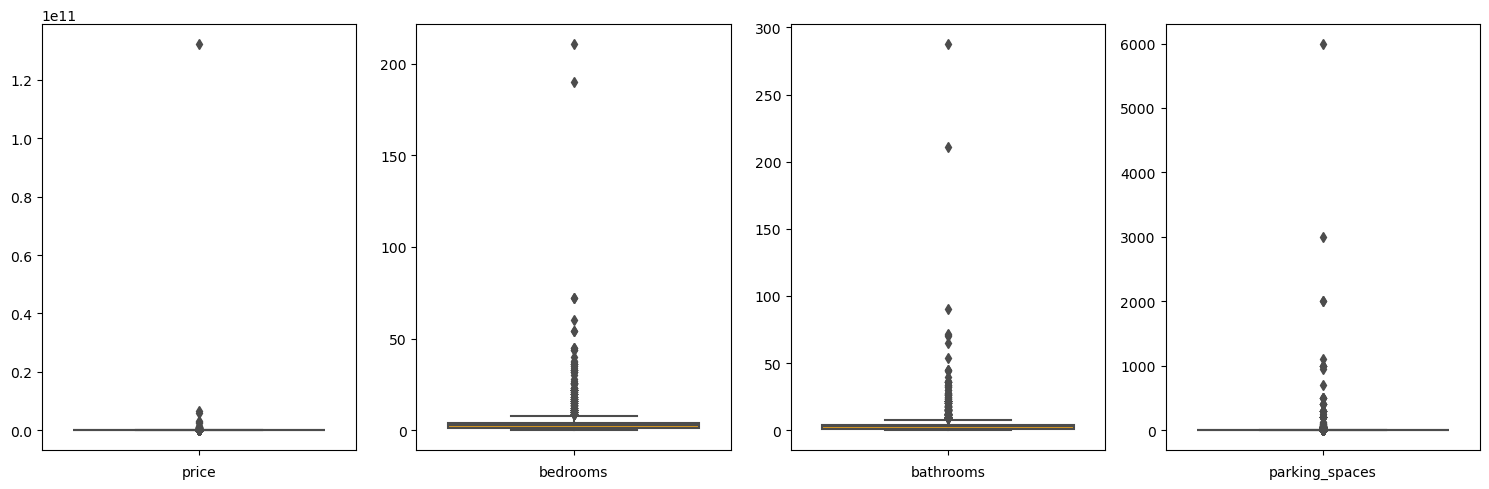

In [80]:
numerical_columns = ["price", "bedrooms", "bathrooms", "parking_spaces", "toilets"]
fig, axarr = plt.subplots(1,4, figsize=(15, 5))

n=0

for col in numerical_columns:
    ax = axarr[n]
    sns.boxplot(y=house_df[col], color="orange", ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("")
    n += 1
    if n > 3:
        break

plt.tight_layout()
plt.show()

We will be removing out the outliers in the numeric columns

## Removing Outlieries

In [81]:
def remove_outliers(data):
    """ 
    This function returns the total outliers in a dataframe column
    and replace the upper and lower outliers using Interquatile Range (IQR)
    """

    # calcuate the third quartile
    Q3 = data.quantile(0.75)

    # calcuate the first quartile
    Q1 = data.quantile(0.25)

    # calcuate the IQR
    IQR = Q3 -Q1

    # calculate lower_fence
    lower_fence = round(Q1 - 1.5*IQR)

    # calculate upper_fence
    upper_fence = round(Q3 + 1.5*IQR)

    # replacing the lower outliers with the lower IQR value
    data.loc[data<lower_fence] = lower_fence

    # replacing the upper outliers with the upper IQR value
    data.loc[data>upper_fence] = upper_fence

    return data

In [82]:
# Remove outliers in each columns
house_df["price"] = remove_outliers(house_df["price"])
house_df["bedrooms"] = remove_outliers(house_df["bedrooms"])
house_df["bathrooms"] = remove_outliers(house_df["bathrooms"])
house_df["parking_spaces"] = remove_outliers(house_df["parking_spaces"])
house_df["toilets"] = remove_outliers(house_df["toilets"])

/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_13348/3310780320.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data<lower_fence] = lower_fence
/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_13348/3310780320.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data>upper_fence] = upper_fence
/var/folders/8s/8kr9355d57gbx1dg94k8jmh00000gn/T/ipykernel_13348/3310780320.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

## Verify No Outliers

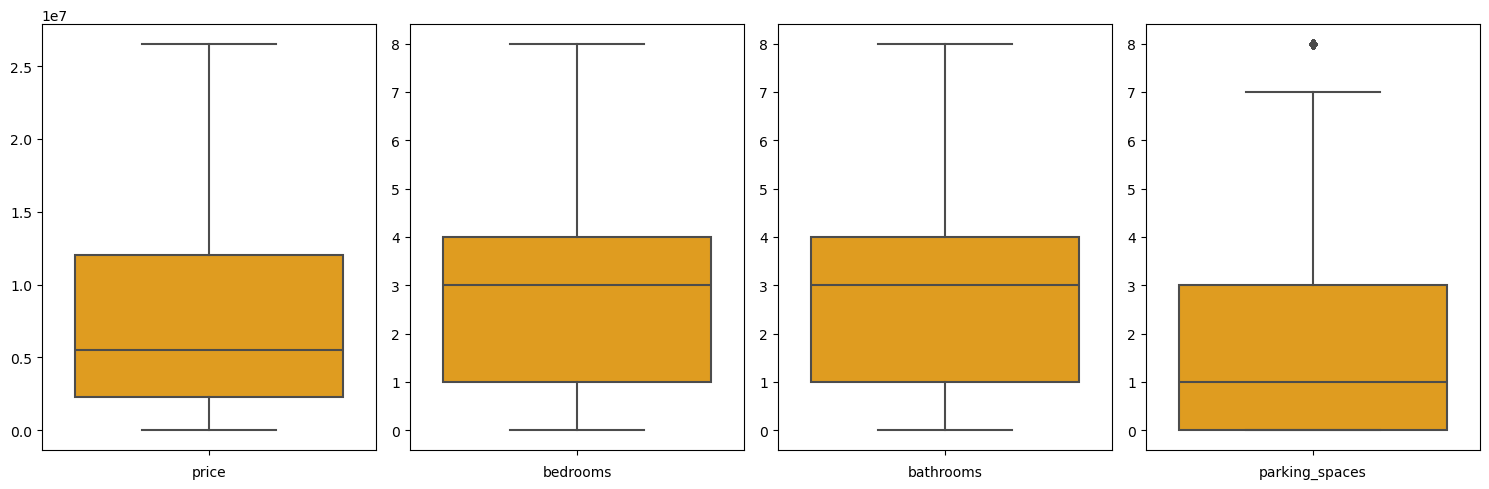

In [83]:
numerical_columns = ["price", "bedrooms", "bathrooms", "parking_spaces", "toilets"]
fig, axarr = plt.subplots(1,4, figsize=(15, 5))

n=0

for col in numerical_columns:
    ax = axarr[n]
    sns.boxplot(y=house_df[col], color="orange", ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("")
    n += 1
    if n > 3:
        break

plt.tight_layout()
plt.show()

# Correlation

In [84]:
house_df.corr(numeric_only=True)

,price,bedrooms,bathrooms,toilets,parking_spaces
price,1.000000,0.474029,0.350011,0.374817,0.045533
bedrooms,0.474029,1.000000,0.729032,0.714032,0.166393
bathrooms,0.350011,0.729032,1.000000,0.872566,0.328611
toilets,0.374817,0.714032,0.872566,1.000000,0.306919
parking_spaces,0.045533,0.166393,0.328611,0.306919,1.000000


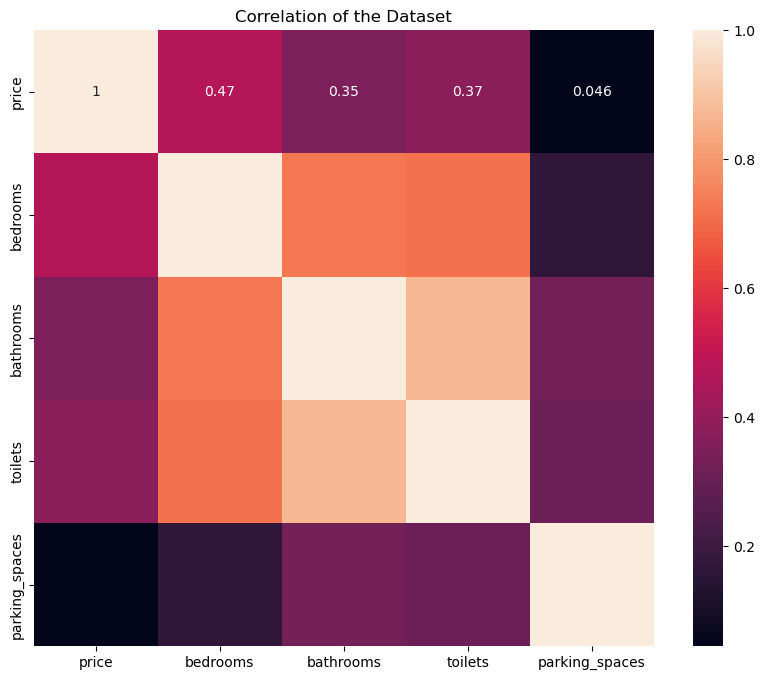

In [85]:
plt.figure(figsize=(10,8))
sns.heatmap(house_df.corr(numeric_only=True), annot=True)
plt.title("Correlation of the Dataset")
plt.show()

<Figure size 1000x800 with 0 Axes>

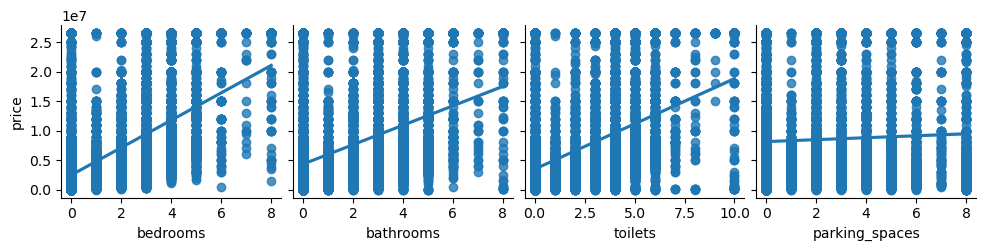

In [86]:
# Lets visualize the correration

columns = ["bedrooms", "bathrooms", "toilets", "parking_spaces"]

plt.figure(figsize=(10, 8))
sns.pairplot(data=house_df, x_vars=columns, y_vars="price", diag_kind="hist", kind="reg")
plt.show()

## Feature Selection

In [87]:
extract_df = house_df[["type", "price", "bedrooms", "bathrooms", "toilets", "parking_spaces", "location"]]

In [88]:
extract_df

,type,price,bedrooms,bathrooms,toilets,parking_spaces,location
0,flat / apartment,3500000.0,3,3,3,0,Lekki
1,flat / apartment,1300000.0,2,2,3,2,Ajah
2,detached duplex,20000000.0,5,5,6,3,Lekki
3,flat / apartment,8500000.0,3,3,3,3,Lekki
4,flat / apartment,2800000.0,2,2,3,2,Lekki
...,...,...,...,...,...,...,...
21589,semi-detached duplex,4000000.0,4,4,5,3,Lekki
21590,flat / apartment,6000000.0,3,4,4,0,Lekki
21591,terraced duplex,2200000.0,3,3,4,4,Ajah
21592,Shop,2500000.0,0,0,1,0,Lekki


## Splitting the Data

In [89]:
X = extract_df.drop(columns=["price"])
y = extract_df["price"]

In [90]:
# Labels
X.head()

,type,bedrooms,bathrooms,toilets,parking_spaces,location
0,flat / apartment,3,3,3,0,Lekki
1,flat / apartment,2,2,3,2,Ajah
2,detached duplex,5,5,6,3,Lekki
3,flat / apartment,3,3,3,3,Lekki
4,flat / apartment,2,2,3,2,Lekki


In [91]:
X.shape

(21594, 6)

In [92]:
# Target
y.head()

0     3500000.0
1     1300000.0
2    20000000.0
3     8500000.0
4     2800000.0
Name: price, dtype: float64

In [93]:
y.shape

(21594,)

## Split Data into Train and Test

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [95]:
X_train.shape

(17275, 6)

In [96]:
X_test.shape

(4319, 6)

In [97]:
y_train.shape

(17275,)

In [98]:
y_test.shape

(4319,)

## One Hot Encoding and Standard Scaling

In [99]:
numeric_columns = ["bedrooms", "bathrooms", "toilets", "parking_spaces"]
cat_columns = ["type", "location"]

In [100]:
# Create the column transformer
processor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_columns)
    ]
)

## Linear Regression Model

In [101]:
# create the pipeline with column transformer and scaler
# Define the pipeline including the scaler
lreg_pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', LinearRegression())
])

# fit the pipeline on the training data
lreg_pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = lreg_pipeline.predict(X_test)

# calculate the evaluation between the actual value and predicted value
accuracy_score = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"R-squared Score: {accuracy_score}")


R-squared Score: 0.6426125929827127


## Lasso Regression Model

In [102]:
# create the pipeline with column transformer and scaler
# Define the pipeline including the scaler
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', Lasso())
])

# fit the pipeline on the training data
lasso_pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = lasso_pipeline.predict(X_test)

# calculate the evaluation between the actual value and predicted value
accuracy_score = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"R-squared Score: {accuracy_score}")


R-squared Score: 0.6427267951125202


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6799135500110163e+17, tolerance: 115029441033319.02
  model = cd_fast.sparse_enet_coordinate_descent(


## Ridged Regression Model

In [103]:
# create the pipeline with column transformer and scaler
# Define the pipeline including the scaler
ridged_pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', Ridge())
])

# fit the pipeline on the training data
ridged_pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = ridged_pipeline.predict(X_test)

# calculate the evaluation between the actual value and predicted value
accuracy_score = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"R-squared Score: {accuracy_score}")


R-squared Score: 0.643263488734885


## GradientBoostingRegressor Model

In [104]:
# create the pipeline with column transformer and scaler
# Define the pipeline including the scaler
gbr_pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', GradientBoostingRegressor())
])

# fit the pipeline on the training data
gbr_pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = gbr_pipeline.predict(X_test)

# calculate the evaluation between the actual value and predicted value
accuracy_score = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"R-squared Score: {accuracy_score}")


R-squared Score: 0.6708040665394854


## RandomForestRegressor Model

In [105]:
# create the pipeline with column transformer and scaler
# Define the pipeline including the scaler
random_pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', RandomForestRegressor())
])

# fit the pipeline on the training data
random_pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = random_pipeline.predict(X_test)

# calculate the evaluation between the actual value and predicted value
accuracy_score = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"R-squared Score: {accuracy_score}")


R-squared Score: 0.656435723473666


## DecisionTreeRegressor Model

In [106]:
# create the pipeline with column transformer and scaler
# Define the pipeline including the scaler
dtree_pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', DecisionTreeRegressor())
])

# fit the pipeline on the training data
dtree_pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = dtree_pipeline.predict(X_test)

# calculate the evaluation between the actual value and predicted value
accuracy_score = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"R-squared Score: {accuracy_score}")


R-squared Score: 0.6164219002390383


## XGBRegressor Model

In [107]:
# create the pipeline with column transformer and scaler
# Define the pipeline including the scaler

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', processor),
    ('model', XGBRegressor())
])

# fit the pipeline on the training data
xgb_pipeline.fit(X_train, y_train)

# make predictions on the test data
y_pred = xgb_pipeline.predict(X_test)

# calculate the evaluation between the actual value and predicted value
accuracy_score = r2_score(y_test, y_pred)

# print the evaluation metrics
print(f"R-squared Score: {accuracy_score}")


R-squared Score: 0.6827381184705767


# Save Model

In [108]:
# Save the model to a file
joblib.dump(xgb_pipeline, '../model/housing_pipeline.pkl')


['../model/housing_pipeline.pkl']

## Thank you

In [109]:
# Lets test

import joblib
import pandas as pd

loaded_pipeline = joblib.load("../model/housing_pipeline.pkl")

# type	bedrooms	bathrooms	toilets	parking_spaces	locatio
test_data = {
    "bedrooms": [2],
    "bathrooms": [3],
    "parking_spaces": [1],
    "location": ["Lekki"],
    "toilets": [4],
    "type": ["detached duplex"]
}

data_df = pd.DataFrame.from_dict(test_data)
data_df

,bedrooms,bathrooms,parking_spaces,location,toilets,type
0,2,3,1,Lekki,4,detached duplex


In [110]:
predictions = loaded_pipeline.predict(data_df)
print(predictions)

[6933440.5]
